In [2]:
import bagpy
from bagpy import bagreader
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
import os
import allantools
import math
from scipy.optimize import least_squares
import scipy.integrate as integrate
from scipy.signal import butter, sosfilt, freqz


/home/drakemoore/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [4]:
b = bagreader('../data/drive_around.bag')
print(b.topic_table)
gps_csv = pd.read_csv(b.message_by_topic('/gps'))
detected_csv = pd.read_csv('../data/fruits.csv')

print(gps_csv)
print(detected_csv)



[INFO]  Successfully created the data folder ../data/drive_around.
  Topics                 Types  Message Count  Frequency
0   /gps  gps_driver/Customgps            420   0.999767
1   /imu   vn_driver/Vectornav          14171  38.610385
             Time  header.seq  header.stamp.secs  header.stamp.nsecs  \
0    1.711657e+09           4         1711657002           247928380   
1    1.711657e+09           5         1711657003           247841835   
2    1.711657e+09           6         1711657004           246653079   
3    1.711657e+09           7         1711657005           260493755   
4    1.711657e+09           8         1711657006           248119831   
..            ...         ...                ...                 ...   
415  1.711657e+09         419         1711657418           264106988   
416  1.711657e+09         420         1711657419           248622417   
417  1.711657e+09         421         1711657420           261044263   
418  1.711657e+09         422         1711

In [22]:
adj_fruit_time = detected_csv['timestamp'] - detected_csv['timestamp'][0]
adj_fruit_time = (adj_fruit_time) * 1e-9 + 20
print(adj_fruit_time)

adj_gps_time = gps_csv['header.stamp.secs'] + gps_csv['header.stamp.nsecs'] * 1e-9
adj_gps_time = adj_gps_time - adj_gps_time[0]



adj_easting = gps_csv['utm_easting'] - gps_csv['utm_easting'][0]
adj_northing = gps_csv['utm_northing'] - gps_csv['utm_northing'][0]

cutoff = 270
cut_easting = adj_easting.to_numpy()[cutoff:] - adj_easting.to_numpy()[cutoff]
cut_northing = adj_northing.to_numpy()[cutoff:] - adj_northing.to_numpy()[cutoff]

print(len(cut_easting))

for i in range(0, len(cut_easting)):
    if abs(cut_easting[i]) > 300 or abs(cut_northing[i]) > 300:
        cut_easting[i] = cut_easting[i-1]
        cut_northing[i] = cut_northing[i-1]


0     20.000000
1     83.195941
2    133.256980
Name: timestamp, dtype: float64
150


In [26]:
fruit_gps = {'High Ripeness': [], 'Medium Ripeness': [], 'Low Ripeness': []}
for i, t in enumerate(adj_fruit_time):
    closest_time = min(adj_gps_time, key=lambda x:abs(x-t))
    index = np.where(adj_gps_time == closest_time)[0][0]
    fruit_gps[detected_csv['ripeness'][i]].append((cut_easting[index], cut_northing[index]))

print(fruit_gps)
color_map = {'High Ripeness': 'red', 'Medium Ripeness': 'orange', 'Low Ripeness': 'green'}
    

{'High Ripeness': [(12.802671607234515, -16.515086985193193)], 'Medium Ripeness': [(36.89066883921623, -148.11258155480027)], 'Low Ripeness': [(-8.222116938442923, -104.85613670293242)]}


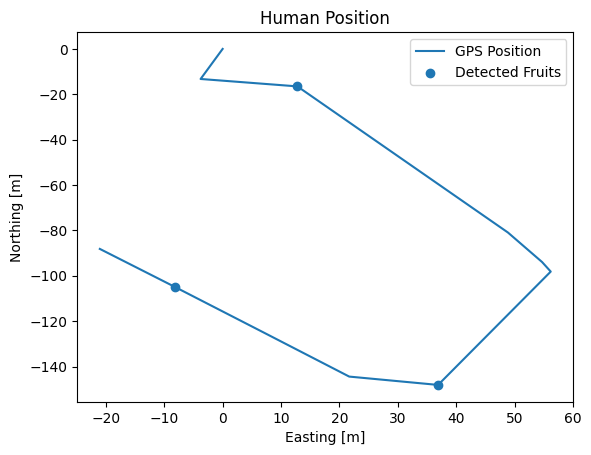

In [25]:


plt.figure()
plt.plot(cut_easting, cut_northing, label='GPS Position')

for key in fruit_gps:
    fruit_gps[key] = np.array(fruit_gps[key])
    plt.scatter(fruit_gps[key][:,0], fruit_gps[key][:,1], label=key, color = color_map[key])


plt.xlabel('Easting [m]')
plt.ylabel('Northing [m]')
plt.title('Human Position')
plt.legend()
plt.show()

In [328]:
import matplotlib.pyplot as plt
print(gps_csv.columns)
# Calculate x and y displacement



Index(['Time', 'header.seq', 'header.stamp.secs', 'header.stamp.nsecs',
       'header.frame_id', 'latitude', 'longitude', 'altitude', 'utm_easting',
       'utm_northing', 'zone', 'letter', 'hdop', 'gpgga_read',
       'current_time.secs', 'current_time.nsecs'],
      dtype='object')
